# In this assignment, you will implement linear regression with one variable.
### 100 points total

In [35]:
# clear all variables
%reset_selective -f a
#import 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


## Load data from data.csv file (5 Points)


In [36]:
# Complete the function below to load the data from data.csv. 
# Return [X,y] where X is the input and y is the target
def load_data(file_name):
    # write your code here
    df = pd.read_csv(file_name, header=0)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
   
    return X,y

# N.B. I use a different load function for the model below.

In [37]:
[X,y] = load_data("data.csv")

### Visualise the data (5 Points)

In [38]:
def vis_data(X,y):
    # write your code here
    plt.scatter(X, y, alpha=0.2) # I have adjusted the alpha here to enhance the visibility of data points
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True) # showing a grid based on visualizations used in lecture slides
    plt.show() # not strictly necessary to include, but nonetheless including for thoroughness

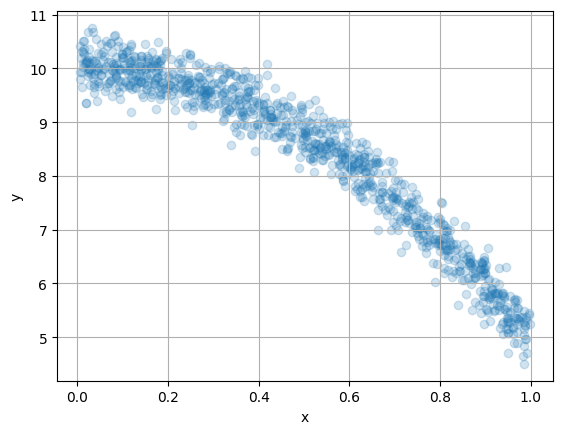

In [39]:
vis_data(X,y)

## Implement a loss function (10 Points)

In [40]:
# y_true --> the target values.
# y_pred --> the predicted values
def loss(y_true, y_pred):    
    #Calculating loss.
    n = len(y_true)
    # least squares cost function per lecture where y_pred is the model output and y_true is the actual output
    # L = 1/2n Σn, i=1 [(w0 + w1xi) - yi]^2
    loss = (1/(2*n)) * np.sum((y_pred - y_true)**2) 
    return loss

## Test loss function

In [41]:
loss(np.array([5,2]),np.array([10,3]))

6.5

## Implement a function to calculate gradients (20 Points)

In [42]:
#Input:
# X --> Input.
# y_true --> target values.
# y_pred --> predictions.
#return:
# dw --> the gradient with respect to the weights
# db --> the gradient with respect to the bias.
def gradients(X, y_true, y_pred):
    # write your code here
    n = len(y_true)
    # per the lecture where dw refers to w1 and db refers to w0; now, the derivative formula in the lecture dropped the 2 in front of the summations; 
    # I am following that convention
    dw = (1/n) * np.sum((y_pred - y_true) * X)
    db = (1/n) * np.sum(y_pred - y_true)

    return dw, db

## Test gradients

In [43]:
dw,db = gradients(np.array([5]),np.array([1.5]),np.array([1.1]))
print(f'dw = {dw} , db = {db}')

dw = -1.9999999999999996 , db = -0.3999999999999999


## Write a function that uses your loss and gradients to train a LR model (25 Points)

In [44]:
# before training the data, I wanted to load it once and split for test and validation; this is not explicitly mentioned in the problem, 
# but this is the approach I would take normally (and based on the practicals)

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import f_regression

def load_split(file_name):
    # write your code here
    df = pd.read_csv(file_name, header=0)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    X = X.reshape(-1)
    y = y.reshape(-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
    # USED THESE AS TEST METHODS FOR SCALING PER THE PRACTICAL AND COMPARING TO NON-SCALING OUTPUT; 
    # NO SCALING WAS NECESSARY FOR THIS DATA SET

    # df = pd.read_csv(file_name, header=0)
    # X = df.iloc[:, :-1].values
    # y = df.iloc[:, -1].values

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # x_scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
    # X_train = x_scaler.transform(X_train)
    # X_test = x_scaler.transform(X_test)

    # y_scaler = MinMaxScaler(feature_range=(0, 1)).fit(y_train.reshape(-1, 1))
    # y_train = y_scaler.transform(y_train.reshape(-1, 1))
    # y_test = y_scaler.transform(y_test.reshape(-1, 1))

    # skb = SelectKBest(score_func=f_regression, k="all")

    # sel_skb = skb.fit(X_train, y_train.ravel())

    # selected_features_ind = sel_skb.get_support()

    # X_train_new = X_train[:, selected_features_ind]
    # X_test_new = X_test[:, selected_features_ind]

    # X_train = X_train_new
    # X_test = X_test_new
    
    return X_train, X_test, y_train, y_test

In [45]:
# pulled this function above train given how I've structured the program

def predict(X, w, b):
    y_pred = (w * X) + b
    return y_pred

In [46]:
# # X --> Input.
# # y --> true/target value.
# # add more arguments as you need
def train(X_train, y_train, eta=0.01, epochs=20000):
    # write your code here
    
    # GRADIENT DESCENT METHOD

    w = 0.0    
    b = 0.0
    losses = []
    y_pred = predict(X_train, w, b)
    
    # checking for convergence using the first method from the lecture; stop after certain number of epochs
    # default n epochs is set at epochs=20000 to achieve at least a 90% r2fit_score; validated here for convergence
    # default learning rate is set at eta=0.01 for this particular data set
    
    # print(f'initial w value: {w}; initial b value: {b}')

    for i in range(epochs):
        
        dw, db = gradients(X_train, y_train, y_pred)

        # gradient descent calculations from the lecture where w0 = db or b and w1 = dw or w
        w = w - (eta * dw)
        b = b - (eta * db)

        y_pred  = predict(X_train, w, b)

        # print(f'epoch {i} w value: {w}; epoch {i} b value: {b}')
        losses.append(loss(y_train, y_pred))

    # returning weights, bias and losses(List).
    return w, b, losses

# CLOSED FORM METHOD - USED TO CROSS-VALIDATE CALCULATIONS OF THE GRADIENT DESCENT METHOD

# X --> Input.
# y --> true/target value.
# add more arguments as you need
# def train(X_train, y_train):
#     x_n = len(X_train)
#     y_n = len(y_train)
#     x_mean = 1/x_n * np.sum(X_train)
#     y_mean = 1/y_n * np.sum(y_train)
#     w = np.sum((X_train - x_mean) * (y_train - y_mean)) / np.sum((X_train - x_mean)**2)
#     b = y_mean - w * x_mean

#     # returning weights, bias
#     return w, b


In [47]:
X_train, X_test, y_train, y_test = load_split("data.csv")
print(f'X_test shape: {X_test.shape}')
w, b, losses = train(X_train, y_train)
print(type(w), type(b), type(X_test))
print(f'weight: {w}; bias: {b}')
print(f'losses: {losses}')

X_test shape: (300,)


<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.ndarray'>
weight: -4.990254088588226; bias: 10.853014818420052
losses: [35.64499145531593, 34.82766210846139, 34.030673306939676, 33.253516604421414, 32.49569626706738, 31.756728955678923, 31.0361434157955, 30.333480175540796, 29.648291251023505, 28.98013985910394, 28.32860013734246, 27.69325687094981, 27.073705226564712, 26.469550492687656, 25.880407826604706, 25.305902007638885, 24.745667196571066, 24.199346701076013, 23.666592747023234, 23.147066255495975, 22.64043662538541, 22.146381521420594, 21.664586667498337, 21.194745645180404, 20.736559697228884, 20.289737536053774, 19.853995156949924, 19.429055656003623, 19.014649052552024, 18.610512116081672, 18.216388197455004, 17.832027064356755, 17.45718474085463, 17.091623350971464, 16.735110966168573, 16.38742145664238, 16.04833434633915, 15.717634671594759, 15.395112843308867, 15.080564512565168, 14.773790439611508, 14.474596366115914, 14.182792890616588, 13.898195347085997

## Write a function to use your model to predict (15 Points)

In [48]:
# I have moved this function above given the structure of my train function.

# def predict(X, w, b):
#     y_pred = (w * X) + b
#     return y_pred

In [49]:
print(f"Weight (w): {w}")
print(f"Bias (b): {b}")
y_pred = predict(X_test, w, b)
print(f'y_test shape: {y_test.shape}')
print(f'y_pred shape: {y_pred.shape}')
print(f'y_pred: {y_pred}')
loss_value = loss(y_test, y_pred)
print(f'loss_value {loss_value}')


Weight (w): -4.990254088588226
Bias (b): 10.853014818420052
y_test shape: (300,)
y_pred shape: (300,)
y_pred: [10.29811113 10.7626404   8.11469378  8.66243589  9.34906265  9.5643097
  9.39013316 10.28633358  6.7517243   6.53391434 10.76124067  8.19511933
  9.94514722 10.25101117  9.94861577  9.86137308  6.26270157  6.0462896
  6.47420652 10.05054178  6.94238717  6.78861014 10.42630552 10.356777
  9.9476059   8.91341638  7.90430889  9.38364003  6.66670021  7.77976635
  7.52173208  9.60423917  8.54484906  7.50105773  8.43512201  7.80586566
  7.21903021  6.96123769  9.66919285  9.89344376  6.12583026  7.37611933
 10.265407    8.64966543  7.64911377  6.22910713  7.34744075  8.66162005
 10.48351319  9.50193011  8.62031343  9.48864406  8.76324349  8.57710971
 10.00205611  8.75910389  6.01291821  6.09205778  9.71202912  6.77797613
  6.25262815  6.01511103  8.81332745 10.72143692  9.58229325 10.38172045
  6.11327192  7.88062616  5.91239455 10.33348654  8.7194765   9.71125384
  8.1727167   9.98

### Visualise your predictions

Text(0.5, 1.0, 'Regression')

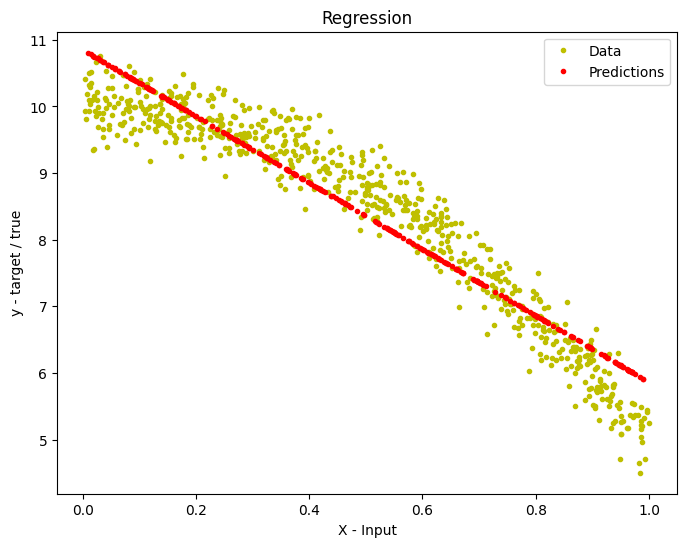

In [50]:
fig = plt.figure(figsize=(8,6))
plt.plot(X_train, y_train, 'y.')
plt.plot(X_test, y_pred, 'r.')
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')

## Calculate the fit score

In [51]:
from sklearn.metrics import r2_score

In [52]:
y_true = y_train
y_pred = predict(X_train, w, b)
print(f'r2_score: {r2_score(y_true, y_pred)}')

r2_score: 0.9000216109479324


### Use scikit-learn to fit a linear regression model using the data from data,csv (20 points)

In [53]:
# write your code here

from sklearn.linear_model import LinearRegression
X_train_reshaped = X_train.reshape(-1, 1)
y_train_flatten = y_train.flatten()
y_train_series = pd.Series(y_train_flatten)
linreg = LinearRegression()
linreg.fit(X_train_reshaped, y_train_series.values.ravel())

LinearRegression()

In [54]:
X_test_reshaped = X_test.reshape(-1, 1)
y_pred = linreg.predict(X_test_reshaped)
print(f"Weight (w): {linreg.coef_}")
print(f"Bias (b): {linreg.intercept_}")
print(f'params: {linreg.get_params()}')


Weight (w): [-4.9902667]
Bias (b): 10.853021451873143
params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


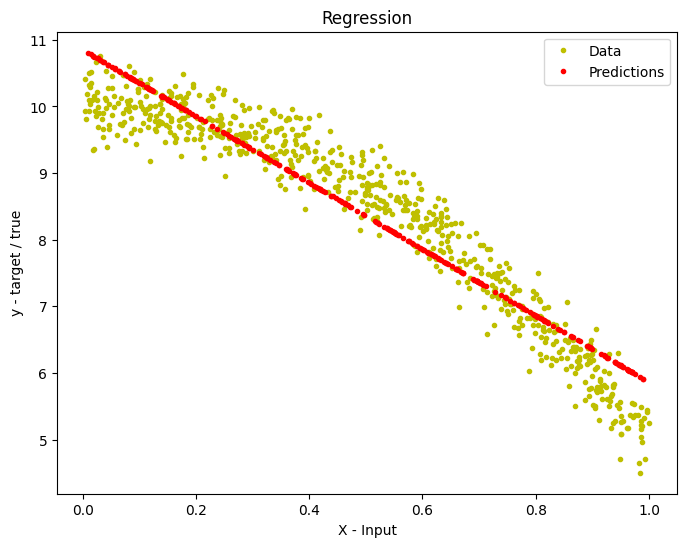

In [55]:
fig = plt.figure(figsize=(8, 6))
plt.plot(X_train, y_train, 'y.')
plt.plot(X_test, y_pred, 'r.')
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')
plt.show()

In [56]:
X_test_reshaped = X_test.reshape(-1, 1)
print('Accuracy of the linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test_reshaped, y_test)))

Accuracy of the linear regression classifier on test set: 0.90
